<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Material-Science/blob/main/Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
              precision    recall  f1-score   support

   Aluminium       1.00      1.00      1.00         1
        Iron       1.00      1.00      1.00         4
     Unknown       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



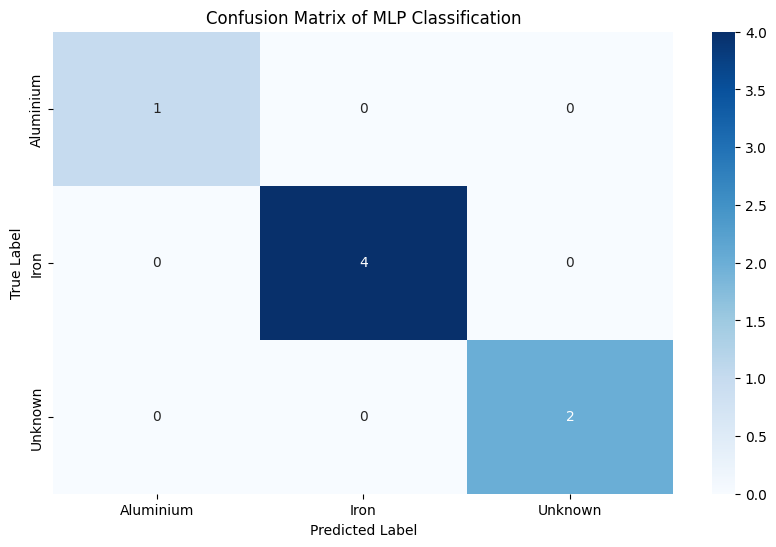

In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels

# Step 1: Load the raw JSON file safely
with open('allData_result.json', 'r') as file:
    raw_data = json.load(file)

# Step 2: Convert raw data to a pandas DataFrame
data = pd.DataFrame(raw_data)

# Step 3: Handle missing or null compositions by filling with empty dictionaries
data['composition'] = data['composition'].fillna({})

# Step 4: Function to classify based on chemical elements (Al, Fe, Co)
def get_class(composition):
    if not composition:
        return 'Unknown'
    elif 'Al' in composition:
        return 'Aluminium'
    elif 'Fe' in composition:
        return 'Iron'
    elif 'Co' in composition:
        return 'Cobalt'
    else:
        return 'Other'

# Step 5: Add a new column for classification based on chemical composition
data['class'] = data['composition'].apply(get_class)

# Step 6: Extract compositions into features
compositions = data['composition'].apply(lambda x: pd.Series(x)).fillna(0)

# Step 7: Label encoding the target classes
le = LabelEncoder()
data['class_encoded'] = le.fit_transform(data['class'])

# Step 8: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(compositions, data['class_encoded'], test_size=0.2, random_state=42)

# Step 9: Create and train an MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Step 10: Predict and evaluate the model
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 11: Use the actual unique labels in the classification report
labels = unique_labels(y_test, y_pred)
print(classification_report(y_test, y_pred, labels=labels, target_names=le.inverse_transform(labels)))

# Step 12: Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.inverse_transform(labels), yticklabels=le.inverse_transform(labels))
plt.title('Confusion Matrix of MLP Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Accuracy: 1.0


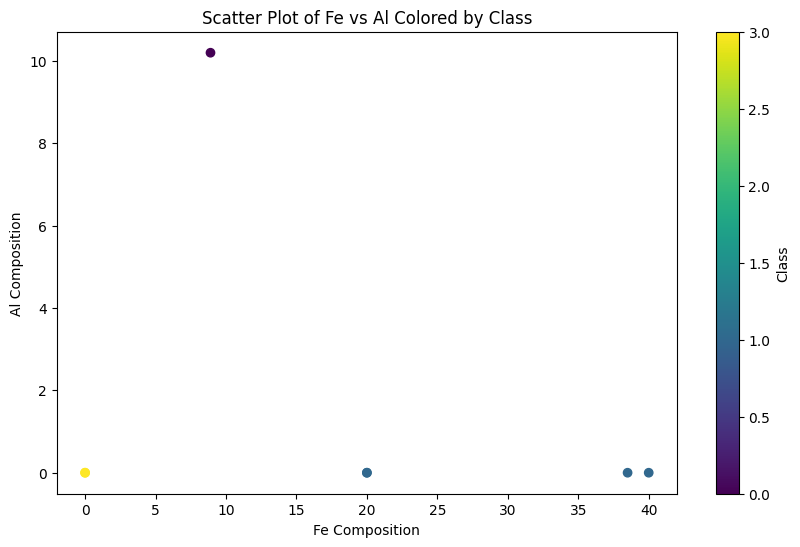

In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels

# Step 1: Load the raw JSON file safely
with open('allData_result.json', 'r') as file:
    raw_data = json.load(file)

# Step 2: Convert raw data to a pandas DataFrame
data = pd.DataFrame(raw_data)

# Step 3: Handle missing or null compositions by filling with empty dictionaries
data['composition'] = data['composition'].fillna({})

# Step 4: Function to classify based on chemical elements (Al, Fe, Co)
def get_class(composition):
    if not composition:
        return 'Unknown'
    elif 'Al' in composition:
        return 'Aluminium'
    elif 'Fe' in composition:
        return 'Iron'
    elif 'Co' in composition:
        return 'Cobalt'
    else:
        return 'Other'

# Step 5: Add a new column for classification based on chemical composition
data['class'] = data['composition'].apply(get_class)

# Step 6: Extract compositions into features (using two elements for scatter plot)
compositions = data['composition'].apply(lambda x: pd.Series(x)).fillna(0)

# Step 7: Label encoding the target classes
le = LabelEncoder()
data['class_encoded'] = le.fit_transform(data['class'])

# Step 8: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(compositions, data['class_encoded'], test_size=0.2, random_state=42)

# Step 9: Create and train an MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Step 10: Predict and evaluate the model
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 11: Scatter plot of the data colored by class
plt.figure(figsize=(10, 6))

# Select two elements from the composition for the scatter plot (e.g., Fe and Co)
element_x = 'Fe'
element_y = 'Al'

# Plot the scatter plot, coloring by the class label
scatter = plt.scatter(X_test[element_x], X_test[element_y], c=y_test, cmap='viridis')

# Add a color bar
plt.colorbar(scatter, label='Class')

# Set plot labels and title
plt.title(f'Scatter Plot of {element_x} vs {element_y} Colored by Class')
plt.xlabel(f'{element_x} Composition')
plt.ylabel(f'{element_y} Composition')

# Display the plot
plt.show()


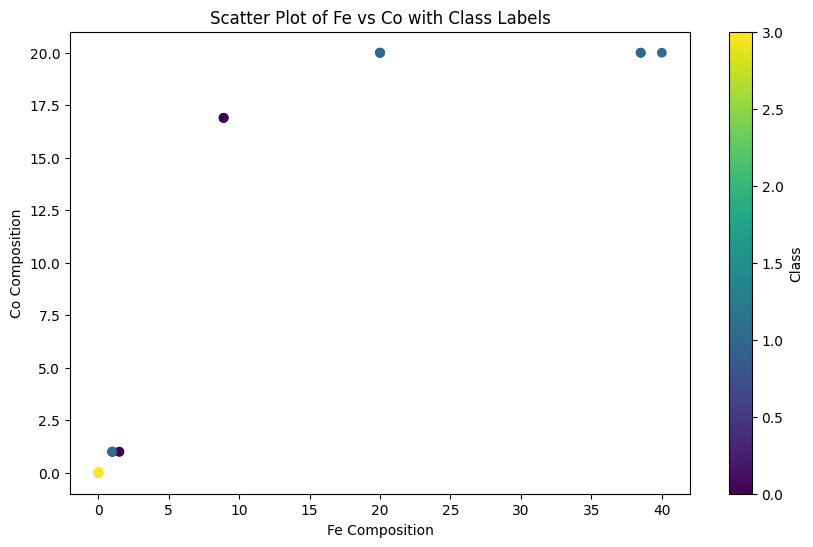

class
Iron         14
Unknown      11
Aluminium     5
Other         4
Name: count, dtype: int64


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the raw JSON file safely
with open('allData_result.json', 'r') as file:
    raw_data = json.load(file)

# Step 2: Convert raw data to a pandas DataFrame
data = pd.DataFrame(raw_data)

# Step 3: Handle missing or null compositions by filling with empty dictionaries
data['composition'] = data['composition'].fillna({})

# Step 4: Rule-based classification function based on chemical elements
def get_class(composition):
    if not composition:
        return 'Unknown'
    elif 'Al' in composition:
        return 'Aluminium'
    elif 'Fe' in composition:
        return 'Iron'
    elif 'Co' in composition:
        return 'Cobalt'
    else:
        return 'Other'

# Step 5: Apply the classification function to assign a class based on composition
data['class'] = data['composition'].apply(get_class)

# Step 6: Visualize the classified data with a scatter plot
# We will select two chemical elements for visualization (e.g., Fe and Co)
element_x = 'Fe'
element_y = 'Co'

# Extract the compositions into features for scatter plotting
compositions = data['composition'].apply(lambda x: pd.Series(x)).fillna(0)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(compositions[element_x], compositions[element_y], c=data['class'].astype('category').cat.codes, cmap='viridis')

# Add a colorbar to show class mappings
plt.colorbar(scatter, label='Class')

# Set plot titles and labels
plt.title(f'Scatter Plot of {element_x} vs {element_y} with Class Labels')
plt.xlabel(f'{element_x} Composition')
plt.ylabel(f'{element_y} Composition')

# Display the plot
plt.show()

# Step 7: Display class counts
print(data['class'].value_counts())


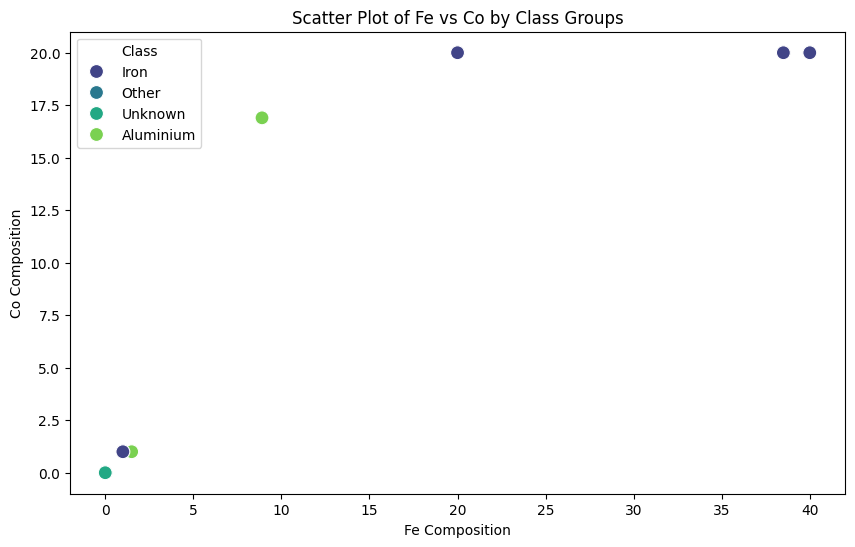

class
Iron         14
Unknown      11
Aluminium     5
Other         4
Name: count, dtype: int64


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the raw JSON file safely
with open('allData_result.json', 'r') as file:
    raw_data = json.load(file)

# Step 2: Convert raw data to a pandas DataFrame
data = pd.DataFrame(raw_data)

# Step 3: Handle missing or null compositions by filling with empty dictionaries
data['composition'] = data['composition'].fillna({})

# Step 4: Rule-based classification function based on chemical elements
def get_class(composition):
    if not composition:
        return 'Unknown'
    elif 'Al' in composition:
        return 'Aluminium'
    elif 'Fe' in composition:
        return 'Iron'
    elif 'Co' in composition:
        return 'Cobalt'
    else:
        return 'Other'

# Step 5: Apply the classification function to assign a class based on composition
data['class'] = data['composition'].apply(get_class)

# Step 6: Extract compositions into features (for visualization)
compositions = data['composition'].apply(lambda x: pd.Series(x)).fillna(0)

# Step 7: Visualize the scatter plot by class groups
plt.figure(figsize=(10, 6))

# Select two elements to plot (e.g., Fe and Co)
element_x = 'Fe'
element_y = 'Co'

# Plot the scatter plot using seaborn
sns.scatterplot(x=compositions[element_x], y=compositions[element_y], hue=data['class'], palette='viridis', s=100)

# Set plot titles and labels
plt.title(f'Scatter Plot of {element_x} vs {element_y} by Class Groups')
plt.xlabel(f'{element_x} Composition')
plt.ylabel(f'{element_y} Composition')

# Show legend and plot
plt.legend(title='Class')
plt.show()

# Step 8: Display class counts
print(data['class'].value_counts())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import json

# Load the data
with open('allData_result.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Prepare the features (X) and target (y)
X = df[['b0', 'd1', 'd2', 'ei', 'ee']].copy()
y = df['composition'].apply(lambda x: tuple(sorted(x.items())) if x else None)

# Remove rows with null compositions
mask = y.notnull()
X = X[mask]
y = y[mask]

# Encode compositions as integers
unique_compositions = y.unique()
composition_to_int = {comp: i for i, comp in enumerate(unique_compositions)}
y = y.map(composition_to_int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Predict compositions for entries with null composition
null_composition_mask = df['composition'].isnull()
X_null = df.loc[null_composition_mask, ['b0', 'd1', 'd2', 'ei', 'ee']]
X_null_scaled = scaler.transform(X_null)
y_null_pred = mlp.predict(X_null_scaled)

# Convert predictions back to compositions
int_to_composition = {i: comp for comp, i in composition_to_int.items()}
predicted_compositions = [dict(int_to_composition[i]) for i in y_null_pred]

# Update the original data with predictions
for i, (idx, row) in enumerate(df[null_composition_mask].iterrows()):
    df.at[idx, 'composition'] = predicted_compositions[i]

# Save the updated data
df.to_json('updated_allData_result.json', orient='records')

print("Predictions complete. Updated data saved to 'updated_allData_result.json'")

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.20         5
   macro avg       0.10      0.10      0.10         5
weighted avg       0.20      0.20      0.20         5

Predictions complete. Updated data saved to 'updated_allData_result.json'


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import json

# Custom JSON encoder to handle numpy types
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)

# Load the data
with open('allData_result.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Prepare the features (X) and target (y)
X = df[['b0', 'd1', 'd2', 'ei', 'ee']].copy()
y = df['composition'].apply(lambda x: tuple(sorted(x.items())) if x else None)

# Remove rows with null compositions for training
mask = y.notnull()
X_train = X[mask]
y_train = y[mask]

# Encode compositions as integers
unique_compositions = y_train.unique()
composition_to_int = {comp: i for i, comp in enumerate(unique_compositions)}
y_train_encoded = y_train.map(composition_to_int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test_scaled)
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Predict compositions for entries with null composition
null_composition_mask = df['composition'].isnull()
X_null = df.loc[null_composition_mask, ['b0', 'd1', 'd2', 'ei', 'ee']]
X_null_scaled = scaler.transform(X_null)
y_null_pred = mlp.predict(X_null_scaled)

# Convert predictions back to compositions
int_to_composition = {i: comp for comp, i in composition_to_int.items()}
predicted_compositions = [dict(int_to_composition[i]) for i in y_null_pred]

# Update the original data with predictions
for i, (idx, row) in enumerate(df[null_composition_mask].iterrows()):
    df.at[idx, 'composition'] = predicted_compositions[i]

# Convert DataFrame to list of dictionaries
result = df.to_dict('records')

# Save the updated data with proper formatting
with open('updated_allData_result.json', 'w') as f:
    json.dump(result, f, indent=2, cls=NumpyEncoder)

print("\nPredictions complete. Updated data saved to 'updated_allData_result.json'")

# Print some statistics
total_entries = len(df)
predicted_entries = len(predicted_compositions)
print(f"\nTotal entries: {total_entries}")
print(f"Entries with predicted compositions: {predicted_entries}")
print(f"Percentage of entries predicted: {predicted_entries/total_entries*100:.2f}%")

# Print a few examples of predicted compositions
print("\nExample predictions:")
for i, comp in enumerate(predicted_compositions[:5]):
    print(f"Example {i+1}: {comp}")

Model Performance:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.20         5
   macro avg       0.10      0.10      0.10         5
weighted avg       0.20      0.20      0.20         5


Predictions complete. Updated data saved to 'updated_allData_result.json'

Total entries: 34
Entries with predicted compositions: 11
Percentage of entries predicted: 32.35%

Example predictions:
Example 1: {'A': 1.0, 'C': 1.0, 'E': 1.0, 'G': 1.0, 'I': 1.0, 'J': 1.0, 'L': 1.0, 'M': 1.0, 'N': 1.0, 'R': 1.0, 'T': 1.0, 'U': 1.0}
Example 2: {'Al': 10.2, 'C': 0.4, 'Co': 16.9, 'Cr': 7.4, 'Fe': 8.9, 'Mo': 0.9, 'Nb': 1.2, 'Ni': 47.9, 'Ti': 5.8, 'W': 0.4}
Example 3: {'B': 1.0, 'C': 1.0, 'Hf': 27.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import json

# Custom JSON encoder to handle numpy types
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)

# Load the data
with open('allData_result.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Prepare the features (X) and target (y)
X = df[['b0', 'd1', 'd2', 'ei', 'ee']].copy()
y = df['composition'].apply(lambda x: tuple(sorted(x.items())) if x else None)

# Separate data with non-null compositions
mask = y.notnull()
X_non_null = X[mask]
y_non_null = y[mask]

# Encode compositions as integers
unique_compositions = y_non_null.unique()
composition_to_int = {comp: i for i, comp in enumerate(unique_compositions)}
y_encoded = y_non_null.map(composition_to_int)

# Split the non-null data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_non_null, y_encoded, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Predict compositions for entries with null composition
null_composition_mask = df['composition'].isnull()
X_null = df.loc[null_composition_mask, ['b0', 'd1', 'd2', 'ei', 'ee']]
X_null_scaled = scaler.transform(X_null)
y_null_pred = mlp.predict(X_null_scaled)

# Convert predictions back to compositions
int_to_composition = {i: comp for comp, i in composition_to_int.items()}
predicted_compositions = [dict(int_to_composition[i]) for i in y_null_pred]

# Update the original data with predictions
for i, (idx, row) in enumerate(df[null_composition_mask].iterrows()):
    df.at[idx, 'composition'] = predicted_compositions[i]

# Convert DataFrame to list of dictionaries
result = df.to_dict('records')

# Save the updated data with proper formatting
with open('updated_allData_result.json', 'w') as f:
    json.dump(result, f, indent=2, cls=NumpyEncoder)

print("\nPredictions complete. Updated data saved to 'updated_allData_result.json'")

# Print some statistics
total_entries = len(df)
non_null_entries = len(y_non_null)
predicted_entries = len(predicted_compositions)
print(f"\nTotal entries: {total_entries}")
print(f"Entries with non-null compositions (used for training/testing): {non_null_entries}")
print(f"Entries with predicted compositions: {predicted_entries}")
print(f"Percentage of entries predicted: {predicted_entries/total_entries*100:.2f}%")

# Print a few examples of predicted compositions
print("\nExample predictions:")
for i, comp in enumerate(predicted_compositions[:5]):
    print(f"Example {i+1}: {comp}")


Model Performance:
Accuracy: 0.2857

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.29         7
   macro avg       0.20      0.27      0.21         7
weighted avg       0.29      0.29      0.27         7


Predictions complete. Updated data saved to 'updated_allData_result.json'

Total entries: 34
Entries with non-null compositions (used for training/testing): 23
Entries with predicted compositions: 11
Percentage of entries predicted: 32.35%

Example predictions:
Example 1: {'A': 1.0, 'C': 1.0, 'E': 1.0, 'G': 1.0, 'I': 1.0, 'J': 1.0, 'L': 1.0, 'M': 1.0, 'N': 1.0, 'R': 1.0, 'T': 1.0, 'U': 1.0}
Example 2: {'Al': 10.2, 'C': 0.4, 'Co': 16.9, '

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 

### Only consider chemical name



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import json

# Load the data
with open('allData_result.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to convert composition dict to a consistent format
def standardize_composition(comp):
    if comp is None:
        return None
    return {k: float(v) for k, v in comp.items()}

# Standardize compositions
df['composition'] = df['composition'].apply(standardize_composition)

# Get unique elements across all compositions
all_elements = set()
for comp in df['composition'].dropna():
    all_elements.update(comp.keys())

# Create a DataFrame with composition percentages
comp_df = pd.DataFrame(index=df.index, columns=all_elements)
for idx, comp in df['composition'].items():
    if comp is not None:
        for element, percentage in comp.items():
            comp_df.at[idx, element] = percentage

# Fill NaN values with 0 (assuming absence of an element means 0%)
comp_df = comp_df.fillna(0)

# Scale the data
scaler = StandardScaler()
comp_scaled = scaler.fit_transform(comp_df)

# Perform K-means clustering with different numbers of clusters
max_clusters = 10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(comp_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(comp_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.savefig('clustering_analysis.png')
plt.close()

# Choose the optimal number of clusters (you may need to adjust this based on the plots)
optimal_clusters = 5  # This is an example, adjust based on the elbow curve and silhouette scores

# Perform final clustering
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = final_kmeans.fit_predict(comp_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Print cluster information
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster}:")
    cluster_comps = df[df['cluster'] == cluster]['composition'].dropna()
    avg_comp = pd.DataFrame(cluster_comps.tolist()).mean()
    print("Average composition:")
    for element, percentage in avg_comp.sort_values(ascending=False).items():
        if percentage > 0:
            print(f"{element}: {percentage:.2f}%")
    print(f"Number of entities: {len(cluster_comps)}")

# Save the updated data with cluster labels
result = df.to_dict('records')
with open('clustered_allData_result.json', 'w') as f:
    json.dump(result, f, indent=2, cls=NumpyEncoder)

print("\nClustering complete. Updated data saved to 'clustered_allData_result.json'")
print("Clustering analysis plots saved to 'clustering_analysis.png'")

ValueError: columns cannot be a set